In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
# Import plotting library
import matplotlib.pyplot as plt

# Set global plot background color
plt.rcParams["figure.facecolor"] = "w"

# Import for SVM classifier
from sklearn.svm import SVC

# Imports for dataset and model selection
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Imports for QSVC classifier
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.kernels import QuantumKernel

# Set the random seed for QSVC
seed = 12345
algorithm_globals.random_seed = seed

In [25]:
features = np.random.rand(100, 3)
label = np.array([np.round(sum(f)/3.0 + np.random.normal(0, .25)) for f in features])

print(label)

[ 0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1. -0.  1.  0.  0.
  0.  0.  1.  1.  0.  0.  0.  1. -0.  0.  0.  1.  1.  1.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.
  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.
  1. -0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.
  1.  0.  0.  0. -0.  1.  1.  1.  0.  1.]


In [52]:
labels = np.array([0 if (sum(f)/3.0 + np.random.normal(0, .2)) < 0.5 else 1 for f in features])
labels

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [57]:
import pickle
    

#@ct.electron
def get_data():
    features = np.load("power_features.npy")
    labels = np.load("power_labels.npy")
    return features,labels
    
#@ct.electron
def split_train_test_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    return X_train, X_test, y_train, y_test

#@ct.electron
def train_qsvc(X_train, y_train):
    feature_map = ZZFeatureMap(feature_dimension=3, reps=4, entanglement="linear")
    backend = QuantumInstance(
        BasicAer.get_backend("qasm_simulator"), shots=16, seed_simulator=seed, seed_transpiler=seed
    )
    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    qsvc = SVC(kernel=kernel.evaluate)
    qsvc.fit(X_train, y_train)
    return qsvc

#@ct.lattice
def prediction_workflow(example):
    filename = 'finalized_model.sav'
    trained_model = pickle.load(open(filename, 'rb'))
    return trained_model.predict(example)

#@ct.lattice
def train_workflow():
    X, y = get_data()
    X_train, X_test, y_train, y_test = split_train_test_data(X=X, y=y)
    qsvc_model = train_qsvc(X_train=X_train, y_train=y_train)
    # save the model to disk
    filename = 'finalized_model.sav'
    pickle.dump(qsvc, open(filename, 'wb'))
    return X_test, y_test, qsvc_model, X_train, X_test, X, y

In [51]:
# def generate_data():    
#     features = np.random.rand(100, 3)
#     labels = np.array([0 if (sum(f)/3.0 + np.random.normal(0, .5)) < 0.5 else 1 for f in features])
#     return features, labels

# features,labels = generate_data()
# print(features)
# np.save("power_features.npy", features)
# np.save("power_labels.npy", labels)

[[0.76315435 0.89841027 0.96352133]
 [0.34646261 0.89812065 0.39367038]
 [0.83794762 0.04038534 0.09921624]
 [0.22561386 0.73493653 0.00949824]
 [0.72754667 0.28377581 0.52272086]
 [0.71519264 0.11805602 0.89526153]
 [0.62863661 0.19520545 0.94151097]
 [0.62195535 0.36579137 0.44432821]
 [0.77417478 0.44648009 0.19605508]
 [0.08180204 0.77703806 0.13201015]
 [0.29890808 0.14552369 0.27422243]
 [0.49518128 0.86881085 0.30986019]
 [0.49888529 0.85710336 0.00099864]
 [0.84060327 0.54924446 0.78188495]
 [0.90925975 0.53855016 0.63880748]
 [0.93045754 0.07356418 0.40353863]
 [0.81647453 0.21141544 0.03151436]
 [0.46220764 0.01655306 0.52527895]
 [0.97126222 0.47788242 0.99684359]
 [0.76085784 0.43167136 0.85407684]
 [0.91924006 0.56732581 0.78930973]
 [0.06360751 0.05937977 0.92914529]
 [0.84057298 0.48214475 0.8806421 ]
 [0.49084978 0.68567732 0.29488994]
 [0.41312676 0.26747853 0.04734864]
 [0.62027053 0.78620669 0.56732758]
 [0.45187948 0.71807922 0.93950422]
 [0.39869867 0.22806033 0.30

In [53]:
X_test, y_test, qsvc_model, X_train, X_test, X, y = train_workflow()
y_pred = qsvc_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Traceback (most recent call last):
  Input In [53] in <cell line: 1>
    X_test, y_test, qsvc_model, X_train, X_test, X, y = train_workflow()
  Input In [52] in train_workflow
    pickle.dump(qsvc, open(filename, 'wb'))
NameError: name 'qsvc' is not defined

Use %tb to get the full traceback.


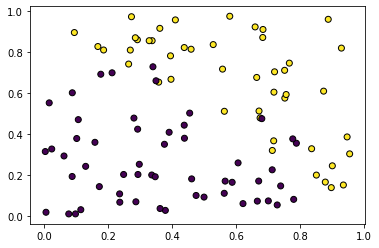

In [46]:
# disp = DecisionBoundaryDisplay.from_estimator(
#     qsvc_model, X, response_method="predict",
#     xlabel="wind_exposure", ylabel="sun_exposure",
#     alpha=0.5,
# )
plt.scatter(X[:, 0],X[:, 1], c=y, edgecolor="k")
plt.show()

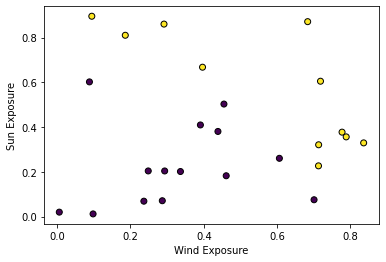

In [56]:
plt.scatter(X_test[:, 0],X_test[:, 1], c=y_pred, edgecolor="k")
plt.xlabel("Wind Exposure")
plt.ylabel("Sun Exposure")

colors = ['b', 'c', 'y', 'm', 'r']

ll = plt.scatter(random(10), random(10), marker='o', color=colors[0])
l  = plt.scatter(random(10), random(10), marker='o', color=colors[1])

plt.legend((lo, ll, l, a, h, hh, ho),
           ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

plt.savefig('power_predictions.png')

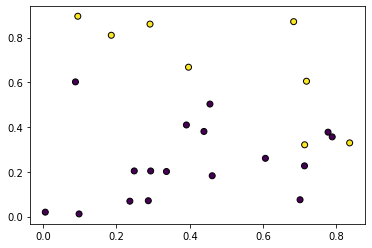

In [48]:
plt.scatter(X_test[:, 0],X_test[:, 1], c=y_test, edgecolor="k")
plt.show()

In [40]:
print(y_pred)

[1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0]


In [25]:
from sklearn.inspection import DecisionBoundaryDisplay
print(X_test.shape)
# DecisionBoundaryDisplay.from_estimator(
#     qsvc_model, X_test, alpha=0.4, response_method="predict"
# )

disp = DecisionBoundaryDisplay.from_estimator(
    qsvc_model, X_test, response_method="predict",
    xlabel="wind_exposure", ylabel="sun_exposure",
    alpha=0.5,
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")

plt.show()

(25, 3)
Traceback (most recent call last):
  Input In [25] in <cell line: 7>
    disp = DecisionBoundaryDisplay.from_estimator(
  File /opt/conda/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:306 in from_estimator
    response = pred_func(X_grid)
  File /opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:810 in predict
    y = super().predict(X)
  File /opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:435 in predict
    return predict(X)
  File /opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:438 in _dense_predict
    X = self._compute_kernel(X)
  File /opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:512 in _compute_kernel
    kernel = self.kernel(X, self.__Xfit)
  File /opt/conda/lib/python3.8/site-packages/qiskit_machine_learning/kernels/quantum_kernel.py:501 in evaluate
    x_vec, y_vec = self._validate_input(x_vec, y_vec)
  File /opt/conda/lib/python3.8/site-packages/qiskit_machine_learning/kernels/quantum_kernel.p

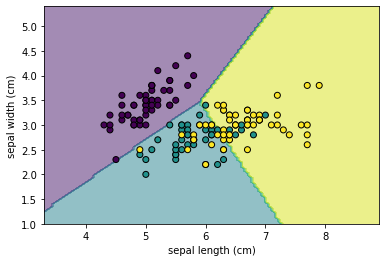

In [28]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[:, :2]
classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

In [50]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(qsvc_model, open(filename, 'wb'))

In [94]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8


In [95]:
np.random.normal(0, .1)

-0.1591859939469502

In [97]:
print(loaded_model.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': <bound method QuantumKernel.evaluate of <qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7f97d267cfa0>>, 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [100]:
filename = 'finalized_model.sav'
trained_model = pickle.load(open(filename, 'rb'))
feature_map = ZZFeatureMap(feature_dimension=3, reps=4, entanglement="linear")
backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=16, seed_simulator=seed, seed_transpiler=seed
)
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
qsvc = SVC(kernel=kernel.evaluate)
#print(qsvc.score(X_test, y_test))
print(trained_model.get_params())
qsvc.set_params(trained_model.get_params())
print(qsvc.score(X_test, y_test))


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': <bound method QuantumKernel.evaluate of <qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7f97d535b2b0>>, 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Traceback (most recent call last):
  Input In [100] in <cell line: 11>
    qsvc.set_params(trained_model.get_params())
TypeError: set_params() takes 1 positional argument but 2 were given

Use %tb to get the full traceback.
